In [1]:
import numpy as np
from collections import defaultdict
import re
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

from vec_to_shorter_vec_skip_gram import Vec2ShorterVecSkipGram

# Testing ON Mnist

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(train_X.shape[0],-1)
mnist_data =  pd.DataFrame(train_X)
mnist_data = mnist_data.loc[:,mnist_data.sum()!=0]

## Toy problem - Finding 2 very distinct classes
- Reducing into only 3 dimensions
- labels of 7 and 0 which are extreamly distinct
- 100 obs
- Selecting only columns with high variance.
- Only 20 epochs are needed (even 10 will do)

In [3]:
np.random.seed(42)
k = 2
N = 3
mnist_sampled = mnist_data.loc[(train_y==7) | (train_y==0)].sample(100)
obs2vec = Vec2ShorterVecSkipGram(mnist_sampled.loc[:,mnist_sampled.var()>mnist_sampled.var().quantile(0.4)], k, N)
obs2vec.train(epochs=20, learning_rate=0.02)

Epoch 1/20, Loss: 397549.9629
Epoch 2/20, Loss: 396082.1604
Epoch 3/20, Loss: 394717.4953
Epoch 4/20, Loss: 394302.2759
Epoch 5/20, Loss: 394112.2074
Epoch 6/20, Loss: 393948.0057
Epoch 7/20, Loss: 393827.4332
Epoch 8/20, Loss: 393748.9163
Epoch 9/20, Loss: 393701.9060
Epoch 10/20, Loss: 393676.5058
Epoch 11/20, Loss: 393663.8104
Epoch 12/20, Loss: 393657.5808
Epoch 13/20, Loss: 393654.4353
Epoch 14/20, Loss: 393652.7596
Epoch 15/20, Loss: 393651.8052
Epoch 16/20, Loss: 393651.2203
Epoch 17/20, Loss: 393650.8328
Epoch 18/20, Loss: 393650.5559
Epoch 19/20, Loss: 393650.3436
Epoch 20/20, Loss: 393650.1719


### Getting results from NN model

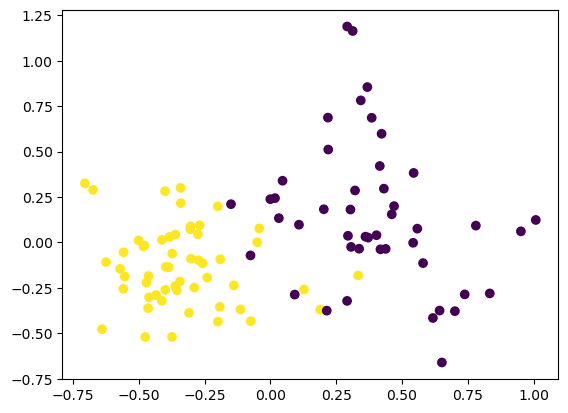

In [4]:
res = pd.concat([pd.DataFrame(obs2vec.get_obs_vector(idx),index = [idx]) for idx in mnist_sampled.index.values])
plt.scatter(x=res.iloc[:,0],y=res.iloc[:,1],c=pd.Series(train_y).iloc[res.index])

### Does it helps K-means to classify?

Adjusted Rand Index (ARI): 0.9208070336283601
Normalized Mutual Information (NMI): 0.8579977110462825


/Users/tomer/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


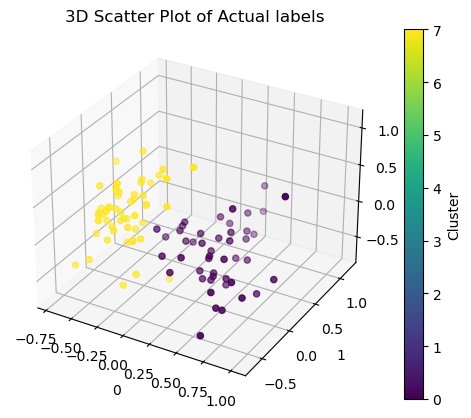

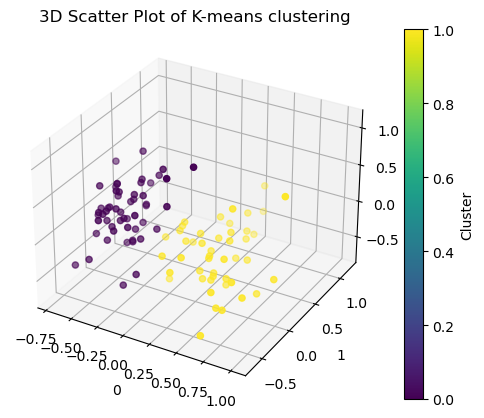

In [11]:
def evaluate_kmeans(df, known_labels, n_clusters):
    # Apply k-means++ clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    
    # Calculate quality metrics
    ari = adjusted_rand_score(known_labels, cluster_labels)
    nmi = normalized_mutual_info_score(known_labels, cluster_labels)
    
    return ari, nmi, cluster_labels

def plot_3d_scatter(df, cluster_labels, title='K-means clustering'):
    # Select 3 random features
    x_feature, y_feature, z_feature = 0,1,2
    
    # Create 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df[x_feature], df[y_feature], df[z_feature], c=cluster_labels, marker='o')

    # Add labels and title
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)
    ax.set_title(f'3D Scatter Plot of {title}')
    plt.colorbar(scatter, ax=ax, label='Cluster')
    
    plt.show()

np.random.seed(42)
n_clusters = 2

# Generate random known labels for demonstration purposes

# Evaluate k-means clustering
ari, nmi, cluster_labels = evaluate_kmeans(res, pd.Series(train_y).iloc[res.index], n_clusters)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Plot 3D scatter plot with cluster labels
plot_3d_scatter(res, pd.Series(train_y).iloc[res.index], 'Actual labels')
plot_3d_scatter(res, cluster_labels)

## Going bigger , reducing for 3 classes
- 3 labels (0,7 and 5) still easy to distinct.
- 200 samples
- reducing to 6 dimensions (3(labels)!- my rule of tumb)
- only 20 epochs are needed
- Still using columns with high variance (430 columns)

In [12]:
np.random.seed(42)
k = 3
N = 4 
mnist_sampled = mnist_data.loc[(train_y==7) | (train_y==0)| (train_y==5)].sample(200)
obs2vec = Vec2ShorterVecSkipGram(mnist_sampled.loc[:,mnist_sampled.var()>mnist_sampled.var().quantile(0.4)], k, N)
obs2vec.train(epochs=20, learning_rate=0.02)

Epoch 1/20, Loss: 1372461.0302
Epoch 2/20, Loss: 1368905.5711
Epoch 3/20, Loss: 1365126.4004
Epoch 4/20, Loss: 1363683.9413
Epoch 5/20, Loss: 1362993.9548
Epoch 6/20, Loss: 1362286.2079
Epoch 7/20, Loss: 1361905.0787
Epoch 8/20, Loss: 1361813.7344
Epoch 9/20, Loss: 1361792.9764
Epoch 10/20, Loss: 1361786.7423
Epoch 11/20, Loss: 1361784.3372
Epoch 12/20, Loss: 1361783.2184
Epoch 13/20, Loss: 1361782.6164
Epoch 14/20, Loss: 1361782.2491
Epoch 15/20, Loss: 1361782.0026
Epoch 16/20, Loss: 1361781.8221
Epoch 17/20, Loss: 1361781.6868
Epoch 18/20, Loss: 1361781.5773
Epoch 19/20, Loss: 1361781.4888
Epoch 20/20, Loss: 1361781.4162


### Getting Results

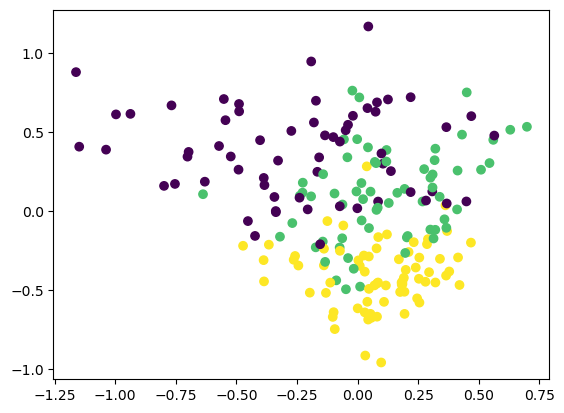

In [13]:
res = pd.concat([pd.DataFrame(obs2vec.get_obs_vector(idx),index = [idx]) for idx in mnist_sampled.index.values])
plt.scatter(x=res.iloc[:,1],y=res.iloc[:,3],c=pd.Series(train_y).iloc[res.index])

### K-means?

Adjusted Rand Index (ARI): 0.39156557652591323
Normalized Mutual Information (NMI): 0.3588814321174143


/Users/tomer/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


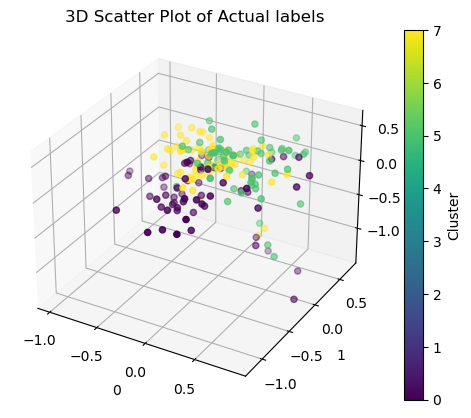

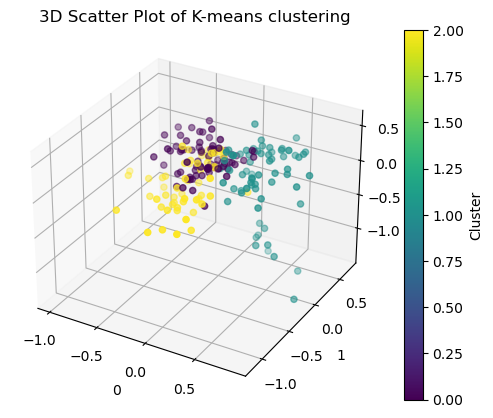

In [14]:
np.random.seed(42)
n_clusters = 3

# Generate random known labels for demonstration purposes

# Evaluate k-means clustering
ari, nmi, cluster_labels = evaluate_kmeans(res, pd.Series(train_y).iloc[res.index], n_clusters)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Plot 3D scatter plot with cluster labels
plot_3d_scatter(res, pd.Series(train_y).iloc[res.index], 'Actual labels')
plot_3d_scatter(res, cluster_labels)

### Going Really big
- 4 labels (0,5,7 and 8) harder to distinct.
- 1000 samples
- reducing to 5 dimensions.
- 4 targets for each obs for each feature.
- only 20 epochs are needed.
- Using columns with medium-high variance (500 columns(out of 576))

In [16]:
np.random.seed(42)
k = 4
N = 5
mnist_sampled = mnist_data.loc[(train_y==7) | (train_y==0)| (train_y==5)| (train_y==8)].sample(1000)
obs2vec = Vec2ShorterVecSkipGram(mnist_sampled.loc[:,mnist_sampled.var()>mnist_sampled.var().quantile(0.3)], k, N)
obs2vec.train(epochs=20, learning_rate=0.03)

Epoch 1/20, Loss: 13914394.3322
Epoch 2/20, Loss: 13858163.6403
Epoch 3/20, Loss: 13847002.9373
Epoch 4/20, Loss: 13845770.4484
Epoch 5/20, Loss: 13845442.3819
Epoch 6/20, Loss: 13845026.4486
Epoch 7/20, Loss: 13844704.5091
Epoch 8/20, Loss: 13844570.9334
Epoch 9/20, Loss: 13844529.8972
Epoch 10/20, Loss: 13844517.6526
Epoch 11/20, Loss: 13844513.7043
Epoch 12/20, Loss: 13844512.2795
Epoch 13/20, Loss: 13844511.7022
Epoch 14/20, Loss: 13844511.4468
Epoch 15/20, Loss: 13844511.3219
Epoch 16/20, Loss: 13844511.2581
Epoch 17/20, Loss: 13844511.2266
Epoch 18/20, Loss: 13844511.2080
Epoch 19/20, Loss: 13844511.1974
Epoch 20/20, Loss: 13844511.1930


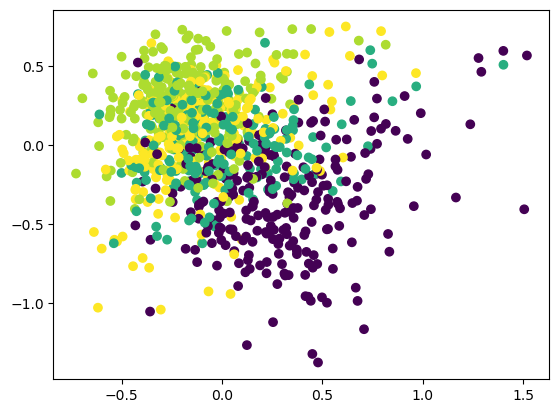

In [20]:
res = pd.concat([pd.DataFrame(obs2vec.get_obs_vector(idx),index = [idx]) for idx in mnist_sampled.index.values])
plt.scatter(x=res.iloc[:,0],y=res.iloc[:,1],c=pd.Series(train_y).iloc[res.index])

Adjusted Rand Index (ARI): 0.15430962770479825
Normalized Mutual Information (NMI): 0.16326236662828636


/Users/tomer/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


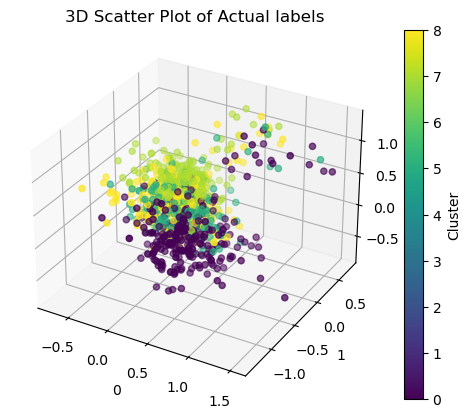

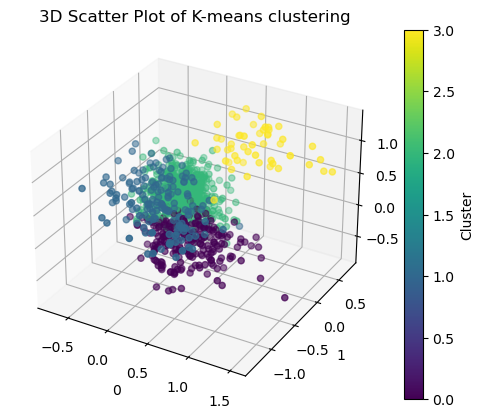

In [18]:
np.random.seed(42)
n_clusters = 4

# Generate random known labels for demonstration purposes

# Evaluate k-means clustering
ari, nmi, cluster_labels = evaluate_kmeans(res, pd.Series(train_y).iloc[res.index], n_clusters)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Plot 3D scatter plot with cluster labels
plot_3d_scatter(res, pd.Series(train_y).iloc[res.index], 'Actual labels')
plot_3d_scatter(res, cluster_labels)